In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import seaborn as sns

train_data_full = pd.read_csv("home-data-for-ml-course/train.csv", index_col='Id')
test_data_full = pd.read_csv("home-data-for-ml-course/test.csv", index_col='Id')

print("train_data_full.columns: {}, \ntest_data_full,columns: {}".format(train_data_full.columns, test_data_full.columns))
print("train_data_full.shape: {}, test_data_full.shape: {}".format(train_data_full.shape, test_data_full.shape))

train_data_full.columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',

In [2]:
y = train_data_full['SalePrice']

X = train_data_full.drop(columns=['SalePrice']).select_dtypes(exclude='object')

X_test = test_data_full.select_dtypes(exclude='object')
print("X:{} \n{}  \n\ny:{} \n{}".format(X.shape, X.describe(), y.shape, y.describe()))
print("\n\nX_test:{} \n{}".format(X_test.shape, X_test.describe()))

X:(1460, 36) 
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   

In [3]:
# check missing entries
print("Missing data:\nX:nrows {} \nX.isna().sum():{}\n{}".format(X.shape[0], type(X.isna().sum()), X.isna().sum()))
print("\n\nMissing data:\ny:nrows {} \ny.isna().sum():{}\n{}".format(y.shape[0], type(y.isna().sum()), y.isna().sum()))
cols_wMissingEntries = [col for col in X.columns if X[col].isna().sum()]
print("\ncols_wMissingEntries: {}".format(cols_wMissingEntries))

Missing data:
X:nrows 1460 
X.isna().sum():<class 'pandas.core.series.Series'>
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


Missing data:
y:nrows 1460 
y.isna().sum():<class 'numpy.int64'>
0

cols_wMissingEntries: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))
print("y: {}, y_train: {}, y_valid: {}".format(y.shape, y_train.shape, y_valid.shape))

X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)
y: (1460,), y_train: (1168,), y_valid: (292,)


In [5]:
# define function to evaluate mean absolute error with RandomForestRegressor
def estimate_MAE(X_train, X_valid, y_train, y_valid):
    ml_model = RandomForestRegressor(n_estimators=100, random_state=0)
    ml_model.fit(X_train, y_train)
    return mean_absolute_error(y_valid, ml_model.predict(X_valid))

In [6]:
# approach 1 to missing data: drop columns
X_train_reduced = X_train.drop(columns=cols_wMissingEntries)
X_valid_reduced = X_valid.drop(columns=cols_wMissingEntries)
print("approach 1 to missing data: drop columns:  mean absolute error: {}".format(estimate_MAE(X_train_reduced, X_valid_reduced, y_train, y_valid)))
print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))
print("X_train_reduced: {}".format(X_train_reduced.shape))

approach 1 to missing data: drop columns:  mean absolute error: 17837.82570776256
X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)
X_train_reduced: (1168, 33)


In [7]:
# approach 2 to missing data: impute
imputer = SimpleImputer()
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train))
X_valid_imputed = pd.DataFrame(imputer.transform(X_valid))

# imputed dataframe does not have column names, so add them
X_train_imputed.columns = X_train.columns
X_valid_imputed.columns = X_valid.columns
print("X_train_imputed.shape {}, X_valid_imputed.shape {}".format(X_train_imputed.shape, X_valid_imputed.shape))

#print("X_train_imputed: {}".format(X_train_imputed))
print("approach 2 to missing data: impute :  mean absolute error: {}".format(estimate_MAE(X_train_imputed, X_valid_imputed, y_train, y_valid)))
print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))
print("X_train_imputed: {}".format(X_train_imputed.shape))

X_train_imputed.shape (1168, 36), X_valid_imputed.shape (292, 36)
approach 2 to missing data: impute :  mean absolute error: 18062.894611872147
X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)
X_train_imputed: (1168, 36)


In [8]:
# approach 3 to missing data: impute with missing_data flag columns
X_train_wMissingFlags = X_train.copy()
X_valid_wMissingFlags = X_valid.copy()

#for X_tmp in [X_train_imputed_wMissingFlags, X_valid_imputed_wMissingFlags]:
for col in cols_wMissingEntries:
    X_train_wMissingFlags['%s_missing' % col] = X_train[col].isna()
    X_valid_wMissingFlags['%s_missing' % col] = X_valid[col].isna()
    
X_train_imputed_wMissingFlags = pd.DataFrame(imputer.fit_transform(X_train_wMissingFlags))  
X_valid_imputed_wMissingFlags = pd.DataFrame(imputer.fit_transform(X_valid_wMissingFlags)) 

X_train_imputed_wMissingFlags.columns = X_train_wMissingFlags.columns
X_valid_imputed_wMissingFlags.columns = X_valid_wMissingFlags.columns

print("approach 3 to missing data: impute :  mean absolute error: {}".format(estimate_MAE(X_train_imputed_wMissingFlags, X_valid_imputed_wMissingFlags, y_train, y_valid)))
print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))

approach 3 to missing data: impute :  mean absolute error: 18135.90062785388
X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)


In [9]:
print("X_train.columns: {}".format(X_train.columns))

print("\ncols_wMissingEntries: {}".format(cols_wMissingEntries))

X_train.columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

cols_wMissingEntries: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)

X_train[cols_wMissingEntries]: 
       LotFrontage   MasVnrArea  GarageYrBlt
count   956.000000  1162.000000  1110.000000
mean     69.614017   103.481067  1978.140541
std      22.946069   182.676225    24.877265
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1979.000000
75%      80.000000   167.750000  2002.000000
max     313.000000  1600.000000  2010.000000


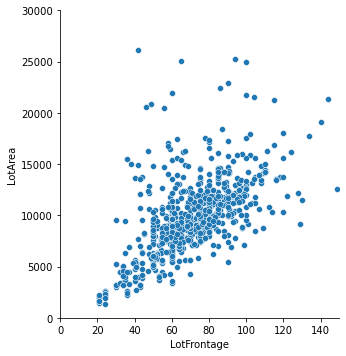

In [10]:
# final approach to missing data

print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))

print("\nX_train[cols_wMissingEntries]: \n{}".format(X_train[cols_wMissingEntries].describe()))
#plt = sns.displot(data=X_train, x='LotFrontage')
sns.relplot(data=X_train, x='LotFrontage', y='LotArea').set(xlim=(0, 150), ylim=(0, 30000))
#plt.set_ylim(0, 80000)
#plt.set(xlim=(0, 150), ylim=(0, 30000))

In [11]:
X_train_Corr = X_train.corr()
X_train_Corr[cols_wMissingEntries]

,LotFrontage,MasVnrArea,GarageYrBlt
MSSubClass,-0.409257,0.015005,0.089108
LotFrontage,1.000000,0.167006,0.069402
LotArea,0.397706,0.085134,-0.038655
OverallQual,0.221039,0.413465,0.558957
OverallCond,-0.061837,-0.107896,-0.295939
YearBuilt,0.123309,0.317524,0.822975
YearRemodAdd,0.082145,0.190797,0.649385
MasVnrArea,0.167006,1.000000,0.254034
BsmtFinSF1,0.163335,0.269300,0.149784
BsmtFinSF2,0.024323,-0.081745,-0.088299


In [12]:
#sns.relplot(data=X_train, x='MasVnrArea', y='LotArea')
#type(X_train_Corr['MasVnrArea'])
X_train_Corr['MasVnrArea'].sort_values(ascending=False)[:6]
#X_train_Corr['MasVnrArea'].sort_values(ascending=True)[:6]

MasVnrArea     1.000000
OverallQual    0.413465
GrLivArea      0.377194
GarageCars     0.370311
TotalBsmtSF    0.364254
GarageArea     0.355533
Name: MasVnrArea, dtype: float64

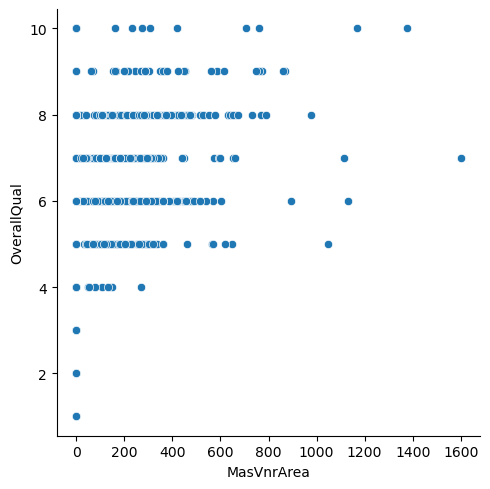

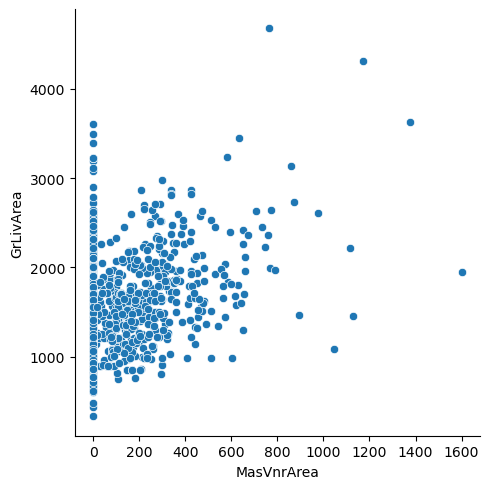

In [13]:
sns.relplot(data=X_train, x='MasVnrArea', y='OverallQual')
sns.relplot(data=X_train, x='MasVnrArea', y='GrLivArea')

In [14]:
X_train.loc[X_train['MasVnrArea'].isna()]['GrLivArea']

Id
1244    2076
1279    2031
937     1200
651     1665
235     1960
974     1428
Name: GrLivArea, dtype: int64

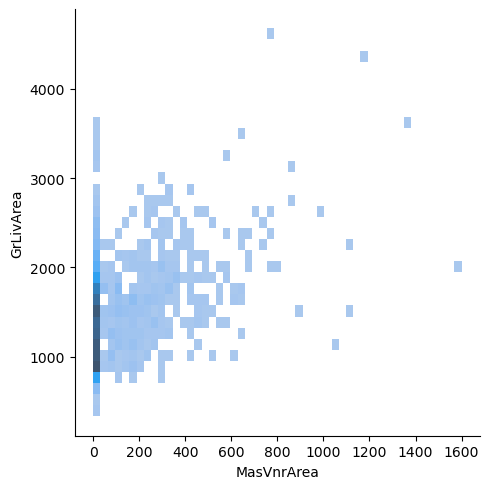

In [15]:
sns.displot(data=X_train, x='MasVnrArea', y='GrLivArea') # 'MasVnrArea' missing value to 0

In [16]:
X_train_Corr['GarageYrBlt'].sort_values(ascending=False)[:6]

GarageYrBlt     1.000000
YearBuilt       0.822975
YearRemodAdd    0.649385
GarageCars      0.585468
OverallQual     0.558957
GarageArea      0.556867
Name: GarageYrBlt, dtype: float64

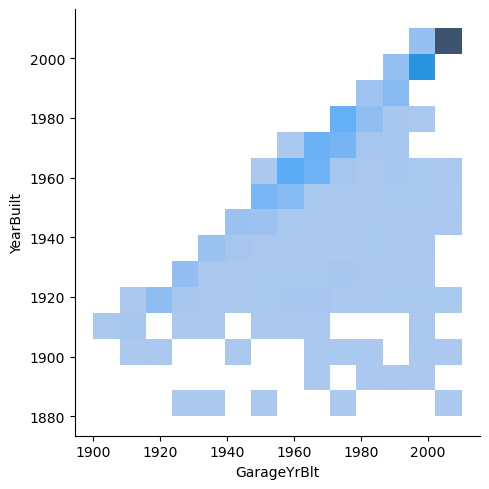

In [17]:
sns.displot(data=X_train, x='GarageYrBlt', y='YearBuilt')

In [18]:
# final dataset

print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))

X_train_final = X_train.copy()
X_valid_final = X_valid.copy()
X_test_final  = X_test.copy()
print("1 X_train_final: {}, X_valid_final: {}, X_test_final: {}".format(
    X_train_final.shape, X_valid_final.shape, X_test_final.shape))

print("cols_wMissingEntries: ",cols_wMissingEntries) 
# cols_wMissingEntries:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# var 'LotFrontage'
var_LotFrontage_valueToUse = X_train_final['LotFrontage'].min()
for X_tmp in [X_train_final, X_valid_final, X_test_final]:
    X_tmp['LotFrontage'].fillna(var_LotFrontage_valueToUse, inplace=True)

# var 'MasVnrArea'
var_MasVnrArea_valueToUse = X_train_final['MasVnrArea'].min()
for X_tmp in [X_train_final, X_valid_final, X_test_final]:
    X_tmp['MasVnrArea'].fillna(var_MasVnrArea_valueToUse, inplace=True)

for X_tmp in [X_train_final, X_valid_final, X_test_final]:
    #print("1: ",X_tmp['GarageYrBlt'].index)
    #for idx in X_tmp['GarageYrBlt'].index:
    for idx in X_tmp.index:
        #print("X {}: {}".format(idx, X_tmp.loc[idx, 'GarageYrBlt']))
        if np.isnan(X_tmp.loc[idx, 'GarageYrBlt']):
            #print("isnan found")
            X_tmp.loc[idx, 'GarageYrBlt'] = X_tmp.loc[idx, 'YearBuilt']
print("X_train_final['GarageYrBlt']: \n{}, \n\nX_train['GarageYrBlt']: \n{}".format(X_train_final['GarageYrBlt'], X_train['GarageYrBlt']))
print("\n\nX_train_final['GarageYrBlt']: \n{}, \n\nX_train['GarageYrBlt']: \n{}".format(X_train_final['GarageYrBlt'].describe(), X_train['GarageYrBlt'].describe()))

print("\n\nX_train_final.isna().any().sum(): {}".format(X_train_final.isna().any().sum()))

print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))
print("1 X_train_final: {}, X_valid_final: {}, X_test_final: {}".format(
    X_train_final.shape, X_valid_final.shape, X_test_final.shape))

X: (1460, 36), X_train: (1168, 36), X_valid: (292, 36), X_testL (1459, 36)
1 X_train_final: (1168, 36), X_valid_final: (292, 36), X_test_final: (1459, 36)
cols_wMissingEntries:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
X_train_final['GarageYrBlt']: 
Id
619     2007.0
871     1962.0
93      1921.0
818     2002.0
303     2001.0
         ...  
764     1999.0
836     1996.0
1217    1978.0
560     2003.0
685     1998.0
Name: GarageYrBlt, Length: 1168, dtype: float64, 

X_train['GarageYrBlt']: 
Id
619     2007.0
871     1962.0
93      1921.0
818     2002.0
303     2001.0
         ...  
764     1999.0
836     1996.0
1217    1978.0
560     2003.0
685     1998.0
Name: GarageYrBlt, Length: 1168, dtype: float64


X_train_final['GarageYrBlt']: 
count    1168.000000
mean     1976.326199
std        26.273277
min      1872.000000
25%      1959.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64, 

X_train['GarageYrBlt']: 
count    1110.000000
me

In [19]:
# add columns indicating missing value flags

#print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))

X_train_final_wMissingValueFlags = X_train_final.copy()
X_valid_final_wMissingValueFlags = X_valid_final.copy()
X_test_final_wMissingValueFlags  = X_test_final.copy()

#print("0: X_train_final.columns {}: {}, \nX_train_final_wMissingValueFlags.columns {}: {}".format(
#    X_train_final.shape, X_train_final.columns, 
#    X_train_final_wMissingValueFlags.shape, X_train_final_wMissingValueFlags.columns))

for X_tmp_pair in [(X_train_final_wMissingValueFlags, X_train), 
                   (X_valid_final_wMissingValueFlags, X_valid), 
                   (X_test_final_wMissingValueFlags, X_test)]:
    #print("\n\nX_0: \n{} \nX_1: \n{}".format(X_tmp_pair[0][cols_wMissingEntries].describe(), X_tmp_pair[1][cols_wMissingEntries].describe()))
    X_tmp_final = X_tmp_pair[0]
    X_tmp       = X_tmp_pair[1]
    for col in cols_wMissingEntries:
        X_tmp_final['%s_missing' % col] = X_tmp[col].isna()
    
print("1: X_train_final.columns {}: {}, \nX_train_final_wMissingValueFlags.columns {}: {}".format(
    X_train_final.shape, X_train_final.columns, 
    X_train_final_wMissingValueFlags.shape, X_train_final_wMissingValueFlags.columns))

print("X: {}, X_train: {}, X_valid: {}, X_testL {}".format(X.shape, X_train.shape, X_valid.shape, X_test.shape))

1: X_train_final.columns (1168, 36): Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'), 
X_train_final_wMissingValueFlags.columns (1168, 39): Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 

In [20]:
# Now test final datasets
print("approach 1 to missing data: drop columns:  mean absolute error: {}".format(estimate_MAE(X_train_reduced, X_valid_reduced, y_train, y_valid)))
print("approach 2 to missing data: impute :  mean absolute error: {}".format(estimate_MAE(X_train_imputed, X_valid_imputed, y_train, y_valid)))
print("approach 3 to missing data: impute :  mean absolute error: {}".format(estimate_MAE(X_train_imputed_wMissingFlags, X_valid_imputed_wMissingFlags, y_train, y_valid)))


print("approach 4 (final) to missing data: impute :  mean absolute error: {}".format(
    estimate_MAE(X_train_final, X_valid_final, y_train, y_valid)))

print("approach 4 (final_wMissingValueFlags) to missing data: impute :  mean absolute error: {}".format(
    estimate_MAE(X_train_final_wMissingValueFlags, X_valid_final_wMissingValueFlags, y_train, y_valid)))


approach 1 to missing data: drop columns:  mean absolute error: 17837.82570776256
approach 2 to missing data: impute :  mean absolute error: 18062.894611872147
approach 3 to missing data: impute :  mean absolute error: 18135.90062785388
approach 4 (final) to missing data: impute :  mean absolute error: 18008.844132420098
approach 4 (final_wMissingValueFlags) to missing data: impute :  mean absolute error: 18114.76788812785


In [22]:
imputer_Median = SimpleImputer(strategy="median")
X_train_imputed_Median = pd.DataFrame(imputer_Median.fit_transform(X_train))
X_valid_imputed_Median = pd.DataFrame(imputer_Median.transform(X_valid))

X_train_imputed_Median.columns = X_train.columns
X_valid_imputed_Median.columns = X_valid.columns

print("approach 5 to missing data: impute :  mean absolute error: {}".format(
    estimate_MAE(X_train_imputed_Median, X_valid_imputed_Median, y_train, y_valid)))

approach 5 to missing data: impute :  mean absolute error: 17791.59899543379


In [32]:
X_test_imputed_Median = pd.DataFrame(imputer_Median.transform(X_test))
X_test_imputed_Median.columns = X_test.columns

model_final = RandomForestRegressor(n_estimators=100, random_state=0)
model_final.fit(X_train_imputed_Median, y_train)
y_predict_final = model_final.predict(X_test_imputed_Median)

y_predict_final_df = pd.DataFrame({"Id": X_test.index,
               "SalePrice": y_predict_final})
y_predict_final_df.to_csv("home-data-for-ml-course/ex_ML_Intermidiate_HousingDataCOmpetition_MissingValues_submission.csv", index=False)

print("Done")
print("X_test_imputed_Median.shape: {}".format(X_test_imputed_Median.shape))

Done
X_test_imputed_Median.shape: (1459, 36)
